# Explore

Data viz is important in the explore phase.

In [76]:
# Walking through this lesson with Zach. This'll be the code that I use:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

import env
import wrangle
# import split_scale



In [13]:
# Setting the defaults for matplotlib figures, so I don't have to automatically define them each time. This is a timesaver step.
plt.rc('font', size = 13)
plt.rc('figure', figsize = (13, 7))

In [14]:
# acquire data and remove null values 
df = wrangle.wrangle_grades()

In [15]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [21]:
# split into train, validate, and test sets
# Notice that we are keeping X and Y together, so far
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

print(f'train dataset shape is: {train.shape}')
print(validate.shape)
print(test.shape)

# Or can do it like this:
train.shape, validate.shape, test.shape

train dataset shape is: (57, 4)
(19, 4)
(26, 4)


((57, 4), (19, 4), (26, 4))

In [19]:
train.head()

,exam1,exam2,exam3,final_grade
10,58,65,70,68
15,85,83,87,87
42,83,80,86,85
51,70,75,78,72
46,73,70,75,76


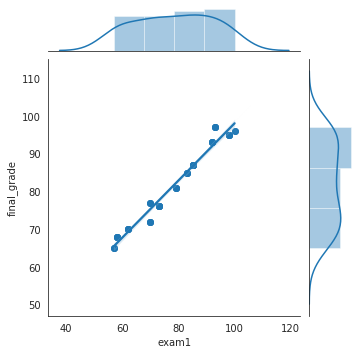

In [8]:
# joinplot example:

with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
plt.show()

## Continuous and Continuous 

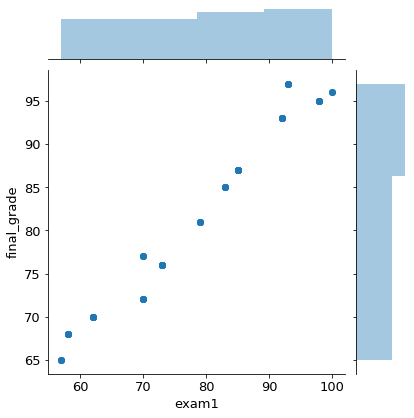

In [23]:
sns.jointplot(x = 'exam1', y = 'final_grade', data = train)

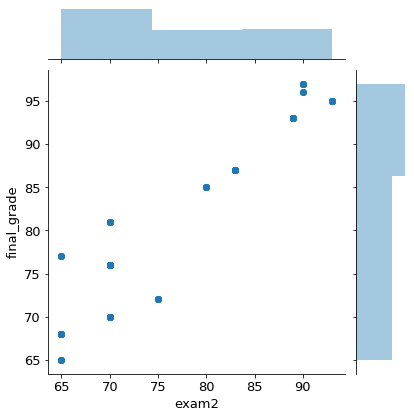

In [25]:
sns.jointplot(x = 'exam2', y = 'final_grade', data = train)

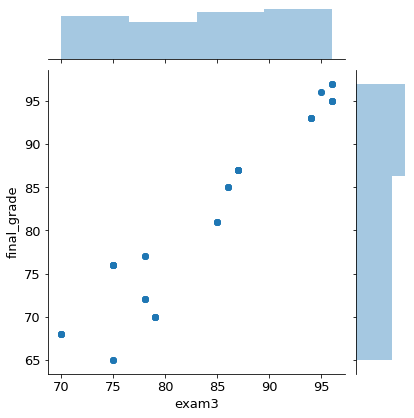

In [24]:
sns.jointplot(x = 'exam3', y = 'final_grade', data = train)

#### Takeaways:
- Is there a strong correlation between exams 1 and 3 and final grade compared to exam 2?

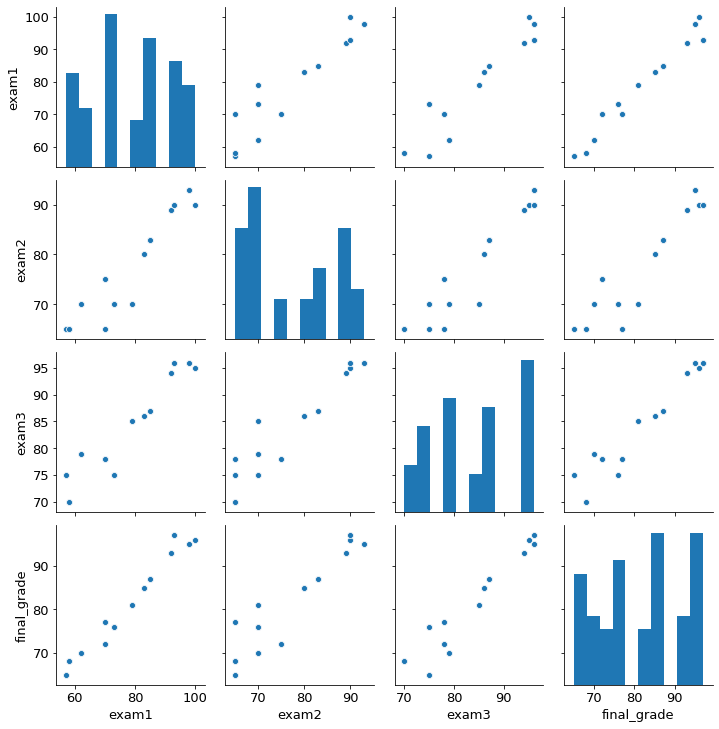

In [26]:
sns.pairplot(train)

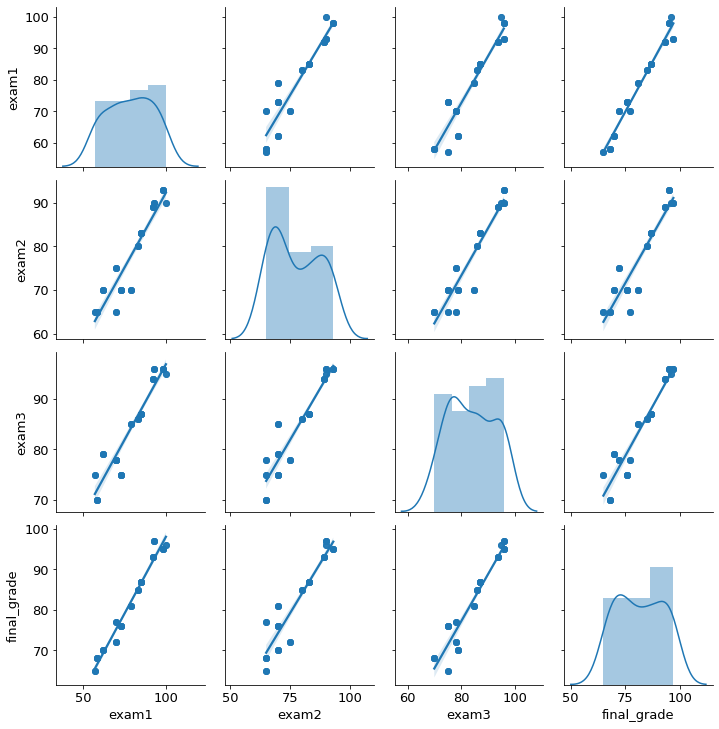

In [30]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

#### Using the PairGrid function with the other plotting graphs, I can exert more control over my charts.

In [31]:
# More ways to look at continuous variables:

train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.935731,0.943801,0.984531
exam2,0.935731,1.000000,0.940658,0.932877
exam3,0.943801,0.940658,1.000000,0.953863
final_grade,0.984531,0.932877,0.953863,1.000000


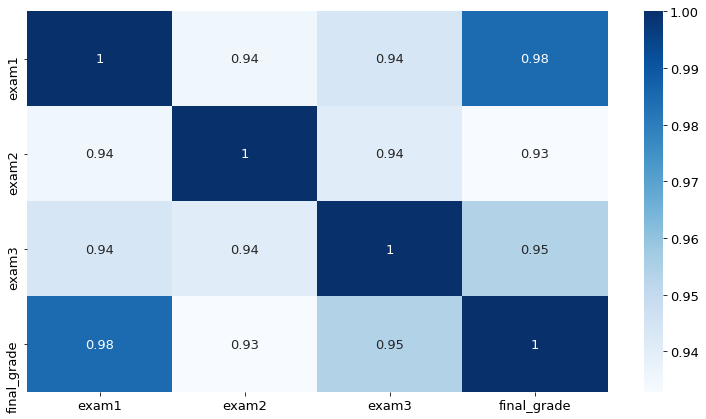

In [34]:
sns.heatmap(train.corr(), cmap = 'Blues', annot = True, )

#### Takeaways:

- Exam 2 has the least correlation with final grade
- Exam 1 has the highest correlation with final grade

## Continuous and Categorical

First I have to create the categorical value, which in this case in a letter grade (either the grade is an A, or B, or C, or D or F, or not). Think some time of boolean.

In [49]:
pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['D', 'C', 'B', 'A']).value_counts()

D    20
A    16
B    11
C    10
Name: exam1, dtype: int64

In [50]:
train.exam1.describe()

count     57.000000
mean      78.315789
std       13.686748
min       57.000000
25%       70.000000
50%       79.000000
75%       92.000000
max      100.000000
Name: exam1, dtype: float64

In [51]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['D', 'C', 'B', 'A'])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
10,58,65,70,68,D
15,85,83,87,87,B
42,83,80,86,85,B
51,70,75,78,72,D
46,73,70,75,76,C


In [129]:
# Vizzes for data exploration:

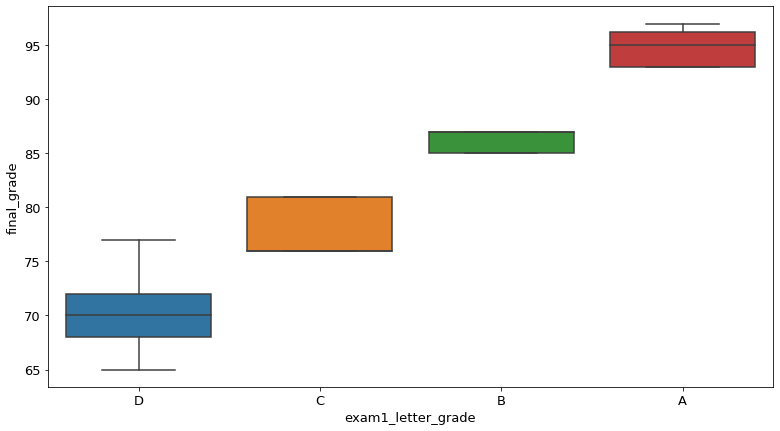

In [128]:
sns.boxplot(y='final_grade', x = 'exam1_letter_grade', data = train)

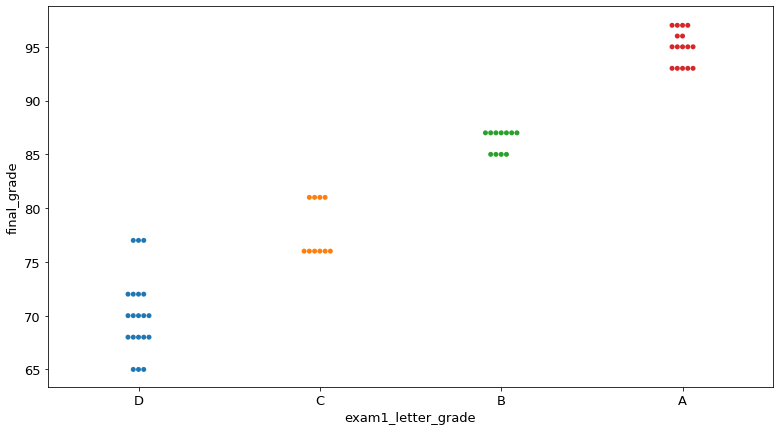

In [54]:
sns.swarmplot(data=train, y='final_grade', x = 'exam1_letter_grade')

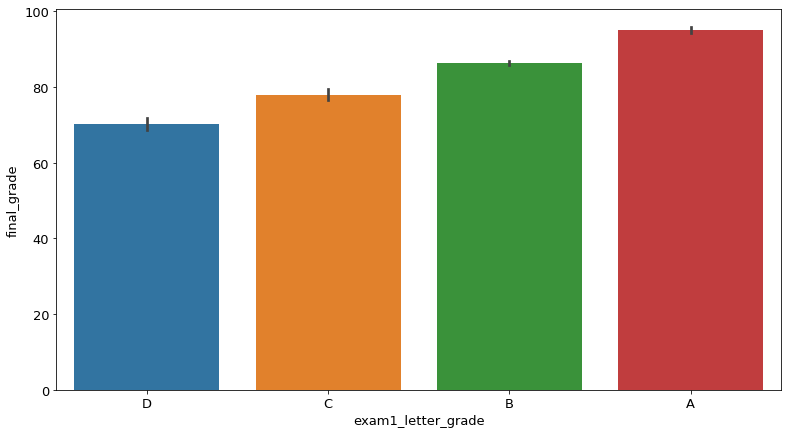

In [56]:
sns.barplot(data = train, y='final_grade', x = 'exam1_letter_grade')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

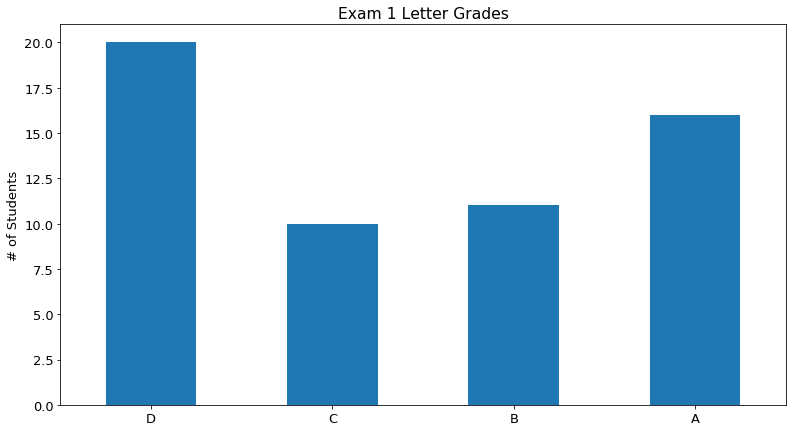

In [126]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title("Exam 1 Letter Grades")
plt.xticks(rotation = 0)

In [127]:
train.value_counts

<bound method DataFrame.value_counts of      exam1  exam2  exam3  final_grade exam1_letter_grade classroom
10      58     65     70           68                  D       One
15      85     83     87           87                  B       Two
42      83     80     86           85                  B       One
51      70     75     78           72                  D       One
46      73     70     75           76                  C       One
22      62     70     79           70                  D       One
85      73     70     75           76                  C       One
39     100     90     95           96                  A       Two
53      98     93     96           95                  A       Two
77      70     75     78           72                  D       One
49      58     65     70           68                  D       Two
35      62     70     79           70                  D       Two
80      85     83     87           87                  B       One
50      57     65     

In [93]:
np.random.seed(123)

# Make a synthetic category


train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])

In [94]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
10,58,65,70,68,D,One
15,85,83,87,87,B,Two
42,83,80,86,85,B,One
51,70,75,78,72,D,One
46,73,70,75,76,C,One


(0, 100)

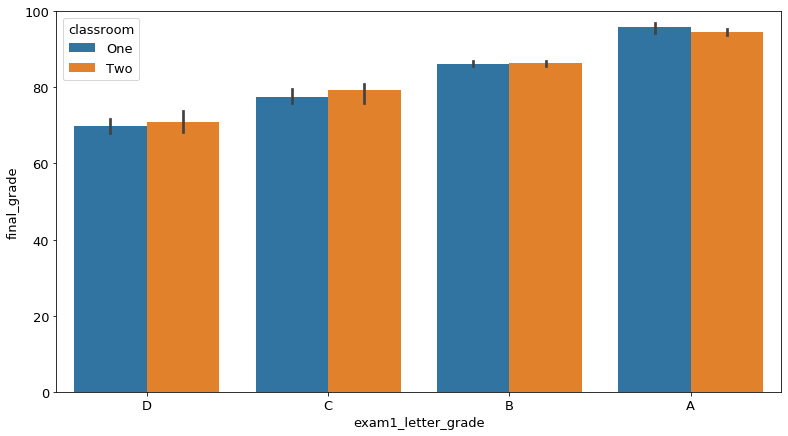

In [95]:
sns.barplot(data = train, y = 'final_grade', x = 'exam1_letter_grade', hue = 'classroom')
plt.ylim(0, 100)

Classroom doesn't impact final grade? Let's run a hypothesis test to confirm.

- alpha = .05
- $H_0$: There is no difference in final grade and classroom one and two
- $H_a$: There is a difference in final grade and classroom one and two

I'll be using a two-sample two-tailed t-test

In [96]:
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var = False,
)

Ttest_indResult(statistic=-1.7801952218777104, pvalue=0.08091811398443013)

#### Takeaways:
- visualize, don't just test
- statistical significance != business significance

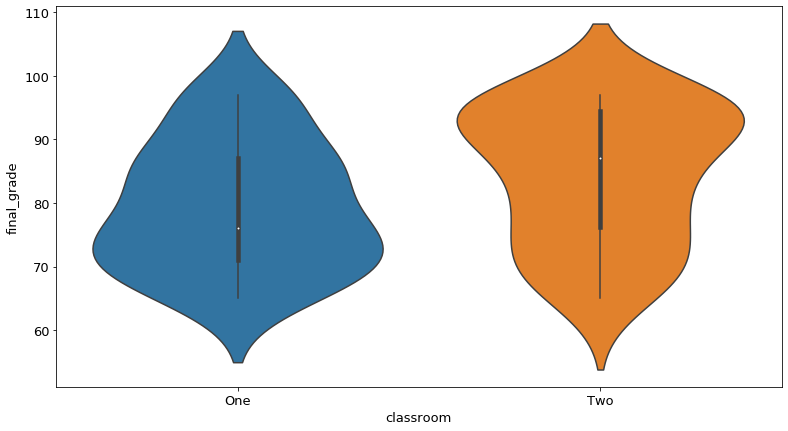

In [97]:
sns.violinplot(data=train, y = 'final_grade', x = 'classroom')

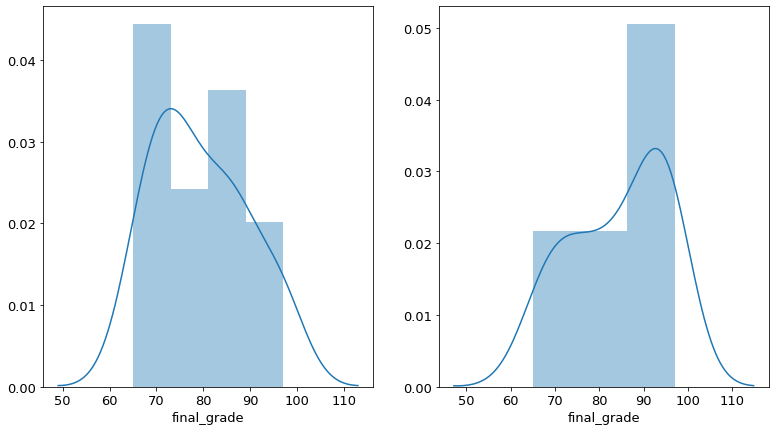

In [98]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)
plt.show()

## Categorical and Categorical

In [99]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
10,58,65,70,68,D,One
15,85,83,87,87,B,Two
42,83,80,86,85,B,One
51,70,75,78,72,D,One
46,73,70,75,76,C,One


In [102]:
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize = True).round(2)

classroom,One,Two
exam1_letter_grade,,
D,0.21,0.14
C,0.12,0.05
B,0.12,0.07
A,0.09,0.19


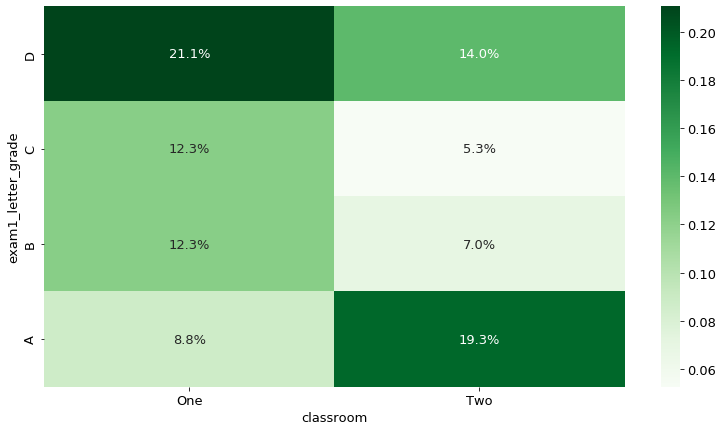

In [114]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize = True)
sns.heatmap(ctab, cmap= 'Greens', annot = True, fmt = '.1%')

In [120]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize = 'index', margins = True)

exam1_letter_grade,D,C,B,A
classroom,,,,
One,0.387097,0.225806,0.225806,0.161290
Two,0.307692,0.115385,0.153846,0.423077
All,0.350877,0.175439,0.192982,0.280702


In [123]:
39+23+22+16

100